#Step 1

Dataset selected : Covid-19 dataset
https://raw.githubusercontent.com/dphi-official/Datasets/master/covid_19_data.csv

#Step 2

1. Create Data Frame

In [29]:
#create data frame

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


2. Index operation - select Country, Confirmed, Deaths, Recovered info from the dataframe

(i) index based selection


In [3]:
#Index operation - select Country, Confirmed, Deaths, Recovered info from the dataframe 
#(i) index based selection
#the 4 selected fields located in column 3,5,6,7 in the dataframe
df.iloc[:,[3,5,6,7]]

,Country/Region,Confirmed,Deaths,Recovered
0,Mainland China,1.0,0.0,0.0
1,Mainland China,14.0,0.0,0.0
2,Mainland China,6.0,0.0,0.0
3,Mainland China,1.0,0.0,0.0
4,Mainland China,0.0,0.0,0.0
...,...,...,...,...
40800,Mexico,501.0,55.0,279.0
40801,Ukraine,1506.0,38.0,675.0
40802,Ukraine,515.0,15.0,322.0
40803,Mainland China,1268.0,1.0,1267.0


Index operation - select Country, Confirmed, Deaths, Recovered info from the dataframe

(ii) label based selection

In [5]:
#Index operation - select Country, Confirmed, Deaths, Recovered info from the dataframe
#(ii) label based selection
df.loc[:,['Country/Region','Confirmed','Deaths','Recovered']]

,Country/Region,Confirmed,Deaths,Recovered
0,Mainland China,1.0,0.0,0.0
1,Mainland China,14.0,0.0,0.0
2,Mainland China,6.0,0.0,0.0
3,Mainland China,1.0,0.0,0.0
4,Mainland China,0.0,0.0,0.0
...,...,...,...,...
40800,Mexico,501.0,55.0,279.0
40801,Ukraine,1506.0,38.0,675.0
40802,Ukraine,515.0,15.0,322.0
40803,Mainland China,1268.0,1.0,1267.0


3. Apply Group, merge and aggregate data frame(s)

In [8]:
#get statistical summary
df.describe()

,SNo,Confirmed,Deaths,Recovered
count,40805.000000,40805.000000,40805.000000,40805.000000
mean,20403.000000,7403.745448,465.412621,2728.499547
std,11779.533204,26483.022808,2392.737598,16413.103519
min,1.000000,0.000000,0.000000,0.000000
25%,10202.000000,44.000000,0.000000,0.000000
50%,20403.000000,458.000000,7.000000,29.000000
75%,30604.000000,2836.000000,82.000000,570.000000
max,40805.000000,405843.000000,41128.000000,547386.000000


In [7]:
#filter data to get the records with last updated date on 2020-06-13 03:33:14
updated_data = df[(df['Last Update'] == '2020-06-13 03:33:14')]

#get the top 5 countries with most number of confirmed cases (group records by country to get the sum of Confirmed cases for each country, then sort)
updated_data.groupby('Country/Region').Confirmed.sum().sort_values(ascending = False).head(5)

Country/Region
US        2048986.0
Brazil     828810.0
Russia     510761.0
India      297535.0
UK         294402.0
Name: Confirmed, dtype: float64

4. Check for missing and invalid values in data

In [12]:
#check number of missing/invalid values for each column
df.isnull().sum()


SNo                    0
ObservationDate        0
Province/State     18015
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

There are 18,015 missing/invalid values in Province/State column, other fields have no missing/invalid values

Example of missing/invalid Province/State values:

In [13]:
df[df['Province/State'].isnull()]

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
35,36,01/22/2020,NaN,Japan,1/22/2020 17:00,2.0,0.0,0.0
36,37,01/22/2020,NaN,Thailand,1/22/2020 17:00,2.0,0.0,0.0
37,38,01/22/2020,NaN,South Korea,1/22/2020 17:00,1.0,0.0,0.0
73,74,01/23/2020,NaN,Japan,1/23/20 17:00,1.0,0.0,0.0
74,75,01/23/2020,NaN,Thailand,1/23/20 17:00,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...
40240,40241,06/12/2020,NaN,West Bank and Gaza,2020-06-13 03:33:14,489.0,3.0,414.0
40241,40242,06/12/2020,NaN,Western Sahara,2020-06-13 03:33:14,9.0,1.0,6.0
40242,40243,06/12/2020,NaN,Yemen,2020-06-13 03:33:14,632.0,139.0,28.0
40243,40244,06/12/2020,NaN,Zambia,2020-06-13 03:33:14,1321.0,10.0,1104.0


5. Propose a way to treat the missing and invalid values and implement the same on the dataframe

The missing/invalid Province/State values can be replaced with 'unknown' 

In [15]:
df['Province/State'].fillna('unknown', inplace = True)

#check missing/values after replace
df.isnull().sum()

SNo                0
ObservationDate    0
Province/State     0
Country/Region     0
Last Update        0
Confirmed          0
Deaths             0
Recovered          0
dtype: int64

The Province/State column no longer has missing/invalid values

6. Compute the mean, sum, range and other interesting statistics for numeric columns

In [20]:
#sum of Recovered cases by country

updated_data.groupby('Country/Region').sum()

,SNo,Confirmed,Deaths,Recovered
Country/Region,,,,
Afghanistan,40077,23546.0,446.0,3928.0
Albania,40078,1416.0,36.0,1034.0
Algeria,40079,10698.0,751.0,7322.0
Andorra,40080,853.0,51.0,781.0
Angola,40081,130.0,5.0,42.0
...,...,...,...,...
West Bank and Gaza,40241,489.0,3.0,414.0
Western Sahara,40242,9.0,1.0,6.0
Yemen,40243,632.0,139.0,28.0


In [21]:
#mean by country
updated_data.groupby('Country/Region').mean()

,SNo,Confirmed,Deaths,Recovered
Country/Region,,,,
Afghanistan,40077.0,23546.0,446.0,3928.0
Albania,40078.0,1416.0,36.0,1034.0
Algeria,40079.0,10698.0,751.0,7322.0
Andorra,40080.0,853.0,51.0,781.0
Angola,40081.0,130.0,5.0,42.0
...,...,...,...,...
West Bank and Gaza,40241.0,489.0,3.0,414.0
Western Sahara,40242.0,9.0,1.0,6.0
Yemen,40243.0,632.0,139.0,28.0


In [22]:
#median
updated_data.groupby('Country/Region').median()

,SNo,Confirmed,Deaths,Recovered
Country/Region,,,,
Afghanistan,40077.0,23546.0,446.0,3928.0
Albania,40078.0,1416.0,36.0,1034.0
Algeria,40079.0,10698.0,751.0,7322.0
Andorra,40080.0,853.0,51.0,781.0
Angola,40081.0,130.0,5.0,42.0
...,...,...,...,...
West Bank and Gaza,40241.0,489.0,3.0,414.0
Western Sahara,40242.0,9.0,1.0,6.0
Yemen,40243.0,632.0,139.0,28.0


#Step 3

1. Ask at least 3 interesting questions about your dataset

i) What are the top 5 countries with the most Confirmed cases?

ii) What are the top 5 countries with the most Recovered cases?

iii) Are the top 5 countries with the most Confirmed and Recovered cases same ?

iv) Which country has the highest death number among all countries?


2. Answer the questions by computing the results using Pandas library

In [25]:
#top 5 countries with most Confirmed cases
updated_data.groupby('Country/Region').Confirmed.sum().sort_values(ascending = False).head(5)


Country/Region
US        2048986.0
Brazil     828810.0
Russia     510761.0
India      297535.0
UK         294402.0
Name: Confirmed, dtype: float64

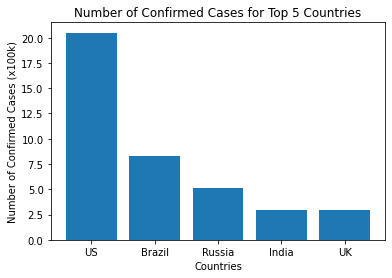

In [46]:
top_5_confirmed_country = ['US', 'Brazil', 'Russia', 'India', 'UK']
US_c = 2048986/100000
Brazil_c = 828810/100000
Russia_c = 510761/100000
India_c = 297535/100000
UK_c = 294402/100000

top_5_confirmed_number = [US_c, Brazil_c, Russia_c, India_c, UK_c]

plt.bar(top_5_confirmed_country, top_5_confirmed_number)
plt.title('Number of Confirmed Cases for Top 5 Countries')
plt.xlabel('Countries')
plt.ylabel('Number of Confirmed Cases (x100k)')

plt.show()

In [26]:
#top 5 countries with most Recovered cases
updated_data.groupby('Country/Region').Recovered.sum().sort_values(ascending = False).head(5)

Country/Region
US         547386.0
Brazil     445123.0
Russia     268862.0
Italy      173085.0
Germany    171535.0
Name: Recovered, dtype: float64

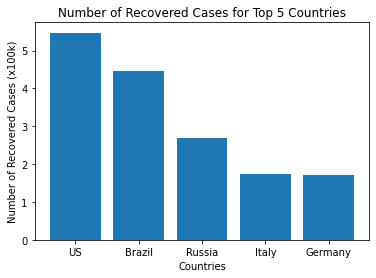

In [45]:
top_5_recovered_country = ['US', 'Brazil', 'Russia', 'Italy', 'Germany']
US_r = 547386/100000
Brazil_r = 445123/100000
Russia_r = 268862/100000
Italy_r = 173085/100000
Germany_r = 171535/100000

top_5_recovered_number = [US_r, Brazil_r, Russia_r, Italy_r, Germany_r]

plt.bar(top_5_recovered_country, top_5_recovered_number)
plt.title('Number of Recovered Cases for Top 5 Countries')
plt.xlabel('Countries')
plt.ylabel('Number of Recovered Cases (x100k)')

plt.show()

In [27]:
#top 5 countries with most Death cases
updated_data.groupby('Country/Region').Deaths.sum().sort_values(ascending = False).head(5)

Country/Region
US        114669.0
Brazil     41828.0
UK         41566.0
Italy      34223.0
France     29377.0
Name: Deaths, dtype: float64

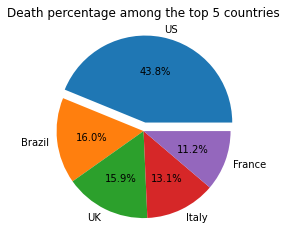

In [52]:
top_5_death_country = ['US','Brazil','UK','Italy','France']
top_5_death_number =[114669,41828,41566,34223,29377]

Explode = [0.1,0,0,0,0]
plt.pie(top_5_death_number, explode=Explode, labels=top_5_death_country, autopct='%1.1f%%')
plt.title('Death percentage among the top 5 countries')
plt.show()

3. Add concluding remarks

i) What are the top 5 countries with the most Confirmed cases?

The top 5 countries with most Confirmed cases are US, Brazil, Russia, India, UK


ii) What are the top 5 countries with the most Recovered cases?

Thr top 5 countries with the most Recovered cases are US, Brazil, Russia, Italy, Germany

iii) Are the top 5 countries with the most Confirmed and Recovered cases same ?

The top 3 countries with most Confirmed cases (US, Brazil, Russia) are also the top 3 countries with most Recovered cases. However, the top 4 & top 5 countries are different.

iv) Which country has the highest death number among all countries?

US has the highest death number among all countries. It contributed close to half (43.8%) of death number when compared among the top 5 countries.